## Implementation

In [1]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/Financial-Data/stocks/TSLA.csv")
data.head()
data = data.dropna()

input = torch.tensor(np.array(data[['Open']]), dtype=torch.float32)
output = torch.tensor(np.array(data['Close']), dtype=torch.float32)

# Example 1

## Set up a simple model manully

In [3]:
xx=np.arange(0,100,0.1)
y= np.sin(xx)
inputs=torch.tensor(xx, dtype=torch.float32)
outputs=torch.tensor(y, dtype=torch.float32)
inputs=inputs.reshape(-1,1)

In [4]:
transition_matrix = torch.tensor([[[1.,0.],[1.,0.]],[[1.,0.],[1.,0.]]])
emission_matrix = torch.tensor([[-0.1,0.1],[0.1,0.1]])

IOHMM = IOHMM_model(num_states=2, inputs=input[:100], outputs=output[:100], max_iter=100, tol=1e-4, transition_matrix=transition_matrix, emission_matrix=emission_matrix)
print(f"initial pi {IOHMM.initial_pi}")
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.lsd)

initial pi Parameter containing:
tensor([-0.6931, -0.6931], requires_grad=True)
Parameter containing:
tensor([[[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]]], requires_grad=True)
Parameter containing:
tensor([[-0.1000,  0.1000],
        [ 0.1000,  0.1000]], requires_grad=True)
Parameter containing:
tensor([1.6094, 1.6094], requires_grad=True)


In [5]:
print(IOHMM._forward())
# torch.sum(IOHMM._forward(), dim=1)

tensor([[-0.6990, -0.6873],
        [-0.6988, -0.6875],
        [-0.6983, -0.6880],
        [-0.6977, -0.6887],
        [-0.6969, -0.6894],
        [-0.6969, -0.6894],
        [-0.6974, -0.6889],
        [-0.6973, -0.6890],
        [-0.6972, -0.6891],
        [-0.6975, -0.6888],
        [-0.6980, -0.6883],
        [-0.6979, -0.6884],
        [-0.6981, -0.6882],
        [-0.6984, -0.6879],
        [-0.6980, -0.6883],
        [-0.6980, -0.6883],
        [-0.6982, -0.6881],
        [-0.6983, -0.6880],
        [-0.6982, -0.6881],
        [-0.6981, -0.6882],
        [-0.6981, -0.6882],
        [-0.6980, -0.6883],
        [-0.6979, -0.6884],
        [-0.6982, -0.6881],
        [-0.6985, -0.6879],
        [-0.6982, -0.6881],
        [-0.6980, -0.6883],
        [-0.6978, -0.6885],
        [-0.6979, -0.6885],
        [-0.6977, -0.6886],
        [-0.6974, -0.6889],
        [-0.6974, -0.6889],
        [-0.6976, -0.6888],
        [-0.6977, -0.6886],
        [-0.6978, -0.6886],
        [-0.6976, -0

In [6]:
print(IOHMM._backward())
# torch.sum(IOHMM._backward(), dim=1)

tensor([[-0.6990, -0.6873],
        [-0.6988, -0.6875],
        [-0.6983, -0.6880],
        [-0.6977, -0.6887],
        [-0.6969, -0.6894],
        [-0.6969, -0.6894],
        [-0.6974, -0.6889],
        [-0.6973, -0.6890],
        [-0.6972, -0.6891],
        [-0.6975, -0.6888],
        [-0.6980, -0.6883],
        [-0.6979, -0.6884],
        [-0.6981, -0.6882],
        [-0.6984, -0.6879],
        [-0.6980, -0.6883],
        [-0.6980, -0.6883],
        [-0.6982, -0.6881],
        [-0.6983, -0.6880],
        [-0.6982, -0.6881],
        [-0.6981, -0.6882],
        [-0.6981, -0.6882],
        [-0.6980, -0.6883],
        [-0.6979, -0.6884],
        [-0.6982, -0.6881],
        [-0.6985, -0.6879],
        [-0.6982, -0.6881],
        [-0.6980, -0.6883],
        [-0.6978, -0.6885],
        [-0.6979, -0.6885],
        [-0.6977, -0.6886],
        [-0.6974, -0.6889],
        [-0.6974, -0.6889],
        [-0.6976, -0.6888],
        [-0.6977, -0.6886],
        [-0.6978, -0.6886],
        [-0.6976, -0

In [7]:
print(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), dim=1)

tensor([[-0.7049, -0.6815],
        [-0.7045, -0.6819],
        [-0.7036, -0.6828],
        [-0.7022, -0.6842],
        [-0.7007, -0.6857],
        [-0.7007, -0.6856],
        [-0.7016, -0.6847],
        [-0.7015, -0.6848],
        [-0.7013, -0.6850],
        [-0.7019, -0.6844],
        [-0.7028, -0.6836],
        [-0.7027, -0.6836],
        [-0.7031, -0.6833],
        [-0.7037, -0.6827],
        [-0.7029, -0.6835],
        [-0.7029, -0.6835],
        [-0.7033, -0.6831],
        [-0.7034, -0.6830],
        [-0.7032, -0.6832],
        [-0.7030, -0.6834],
        [-0.7032, -0.6832],
        [-0.7029, -0.6834],
        [-0.7028, -0.6836],
        [-0.7033, -0.6831],
        [-0.7038, -0.6826],
        [-0.7034, -0.6830],
        [-0.7030, -0.6834],
        [-0.7026, -0.6838],
        [-0.7026, -0.6838],
        [-0.7023, -0.6841],
        [-0.7017, -0.6846],
        [-0.7016, -0.6847],
        [-0.7020, -0.6844],
        [-0.7022, -0.6842],
        [-0.7024, -0.6840],
        [-0.7022, -0

In [8]:
print(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()), axis=1)

tensor([[[-0.6990, -0.6990],
         [-0.6873, -0.6873]],

        [[-0.6988, -0.6988],
         [-0.6875, -0.6875]],

        [[-0.6983, -0.6983],
         [-0.6880, -0.6880]],

        [[-0.6977, -0.6977],
         [-0.6887, -0.6887]],

        [[-0.6969, -0.6969],
         [-0.6894, -0.6894]],

        [[-0.6969, -0.6969],
         [-0.6894, -0.6894]],

        [[-0.6974, -0.6974],
         [-0.6889, -0.6889]],

        [[-0.6973, -0.6973],
         [-0.6890, -0.6890]],

        [[-0.6972, -0.6972],
         [-0.6891, -0.6891]],

        [[-0.6975, -0.6975],
         [-0.6888, -0.6888]],

        [[-0.6980, -0.6980],
         [-0.6883, -0.6883]],

        [[-0.6979, -0.6979],
         [-0.6884, -0.6884]],

        [[-0.6981, -0.6981],
         [-0.6882, -0.6882]],

        [[-0.6984, -0.6984],
         [-0.6879, -0.6879]],

        [[-0.6980, -0.6980],
         [-0.6883, -0.6883]],

        [[-0.6980, -0.6980],
         [-0.6883, -0.6883]],

        [[-0.6982, -0.6982],
         [-

In [9]:
IOHMM._baum_welch()

Iteration 1, likelihood: -inf
Iteration 2, likelihood: -128.3194122314453
Iteration 3, likelihood: -122.14713287353516
Iteration 4, likelihood: -105.50711822509766
Iteration 5, likelihood: -95.90306091308594
Iteration 6, likelihood: -139.03553771972656
Iteration 7, likelihood: -139.0093994140625
Iteration 8, likelihood: -138.90939331054688
Iteration 9, likelihood: -138.8094024658203
Iteration 10, likelihood: -138.7093963623047
Iteration 11, likelihood: -138.60940551757812
Iteration 12, likelihood: -138.5093994140625
Iteration 13, likelihood: -138.40940856933594
Iteration 14, likelihood: -138.3094024658203
Iteration 15, likelihood: -138.2093963623047
Iteration 16, likelihood: -138.10940551757812
Iteration 17, likelihood: -138.0093994140625
Iteration 18, likelihood: -137.90939331054688
Iteration 19, likelihood: -137.8094024658203
Iteration 20, likelihood: -137.7093963623047
Iteration 21, likelihood: -137.60940551757812
Iteration 22, likelihood: -137.5093994140625
Iteration 23, likelihood

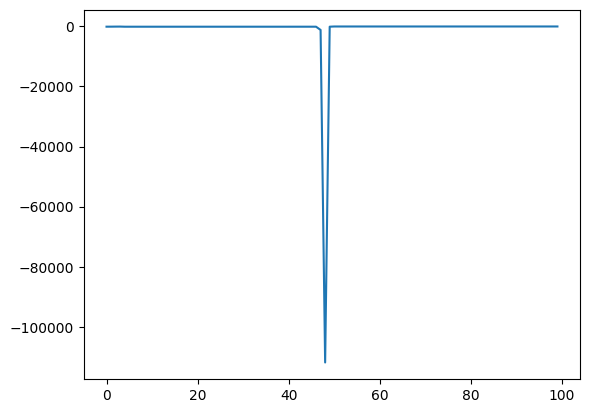

In [10]:
plt.plot(IOHMM.history)

## See the training results

In [11]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.lsd)

Initial pi
Parameter containing:
tensor([-0.4062,  9.0199], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[  -12.5914,    -7.0083],
         [   14.5914,     7.0083]],

        [[ -104.2888,   -27.8632],
         [-5086.7329, -6086.6675]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[ 9.2089, 10.8283],
        [ 6.9770,  6.8714]], requires_grad=True)
Sd
Parameter containing:
tensor([-0.3524,  4.3204], requires_grad=True)


## Viterbi

In [12]:
#call the viterbi algorithm
IOHMM.viterbi()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

## Predict

In [13]:
# predict the next output given the next input
IOHMM.predict(input[11])


tensor(6613269.5000, grad_fn=<SumBackward0>)

In [14]:
output[11]

tensor(1.3260)